# **Análise dos dados para Propor o Método de Avaliação de Impacto.**

## **Objetivo**:

Este notebook realiza etapas de tratamento e análise inicial. Os objetivos aqui são importar os dados, inspecioná-los, fazer tratamentos e manipulações necessárias para garantir a integridade desses e confiabilidade dos resultados, além de melhor desempenho nas consultas e visualizações dos gráficos criado posteriormente no mesmo ambiente no databricks.

Os arquivos em XLSX foram disponibilizados através do link: [clique aqui](https://docs.google.com/spreadsheets/d/1wo-hBfzFua8j0KYpl8BltHlV54--PHf1/edit?usp=sharing&ouid=106520239202789824615&rtpof=true&sd=true)


## **Etapas**:
1. Importação das Bibliotecas

2. Importação dos Dados

3. Inspeção dos Dados

4. Transformação dos Dados

5. Exportação do Dataset Tratado.

**ATENÇÃO:**

Em caso de problemas de execução no ambiente do databricks, o notebook pode ser visualizado também no repositório do GitHub, disponível [aqui](https://github.com/tainahguerras/PMP-Petrobras-Analise).

## **Importação de Bibliotecas**

In [0]:
%pip install openpyxl # Para Instação da biblioteca openpyxl #
%restart_python

# Importações necessárias
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf
import statsmodels.api as sm

from textwrap import dedent
import warnings

# Ignorar alertas irrelevantes
warnings.filterwarnings("ignore")



Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.


## **Importação dos Dados**

## 
Durante a importação dos dados, Definiremos tipos de dados explícitos para cada coluna, garantindo que números, categorias e datas sejam interpretados corretamente. Selecionaremos um conjunto de colunas relevantes para inspeção inicial, que permita verificar elegibilidade, tratamento e variáveis-chave para o RDD. Criaremos um módulo chamado utilities (ou “utils”) para centralizar funções de inspeção e preparação de dados.

In [0]:
import pandas as pd

# Caminho do arquivo
file_path = "/Workspace/Seleção Simplificada Recife/base_prouni_rd_simulada.xlsx"

# Carregar Excel sem definir tipos
df = pd.read_excel(file_path)

# Converter tipos de colunas explicitamente
dtype_dict = {
    'nota_enem': 'float64',
    'corte': 'float64',
    'tratamento': 'int64',
    'emprego_na_area': 'int64',
    'sexo': 'category',
    'raca': 'category',
    'idade': 'int64',
    'renda_pc': 'float64',
    'escola_publica': 'category',
    'curso': 'category',
    'turno': 'category',
    'IES': 'category',
    'ano': 'int64',
    'municipio_escola': 'category'
}
# Selecionar colunas relevantes para inspeção inicial
colunas_relevantes = [
    'nota_enem', 'corte', 'tratamento', 'emprego_na_area',
    'sexo', 'raca', 'idade', 'renda_pc', 'escola_publica',
    'curso', 'turno', 'IES', 'ano', 'municipio_escola'
]
df_inspecao = df[colunas_relevantes].copy()  # Copiar apenas as colunas relevantes
# Etapa 2: Inspeção resumida de dados


## **Inspeção dos Dados**

In [0]:
# Etapa 3: Inspeção resumida de dados com top 5 categorias

# Dataset já carregado
datasets = {}
datasets['SE_AL'] = df.copy()

# Selecionar colunas relevantes
colunas_relevantes = [
    'nota_enem', 'corte', 'tratamento', 'emprego_na_area',
    'sexo', 'raca', 'idade', 'renda_pc', 'escola_publica',
    'curso', 'turno', 'IES', 'ano', 'municipio_escola'
]

df_inspecao = datasets['SE_AL'][colunas_relevantes]

# Resumo geral das colunas
resumo = pd.DataFrame({
    'tipo': df_inspecao.dtypes,
    'valores_unicos': df_inspecao.nunique(),
    'valores_ausentes': df_inspecao.isnull().sum()
})

# Estatísticas básicas para colunas numéricas
estatisticas_num = df_inspecao.select_dtypes(include=['int64','float64']).describe().T

# Estatísticas resumidas para colunas categóricas (top 5 categorias)
estatisticas_cat = {}
for col in df_inspecao.select_dtypes(include=['category']):
    estatisticas_cat[col] = df_inspecao[col].value_counts().head(5)

# Resultado resumido armazenado
resumo_final = {
    'resumo_colunas': resumo,
    'estatisticas_numericas': estatisticas_num,
    'top5_categoricas': estatisticas_cat
}

# Exemplo: acessar o resumo de colunas
resumo_final['resumo_colunas']
# Exemplo: acessar top 5 categorias de 'sexo'
# resumo_final['top5_categoricas']['sexo']

,tipo,valores_unicos,valores_ausentes
nota_enem,int64,317,0
corte,int64,87,0
tratamento,int64,2,0
emprego_na_area,int64,2,0
sexo,object,2,0
raca,object,5,0
idade,int64,15,0
renda_pc,object,3,0
escola_publica,int64,2,0
curso,object,5,0


**Checando tipagem dos dados**

In [0]:
# Checando tipagem dos dados para o dataset Prouni
for chave, df in datasets.items():
    print(f'Tipos de dados em {chave}:')
    print(resumo_final['resumo_colunas']['tipo'])
    print('-'*50)
    # Exibir as 5 primeiras linhas de cada dataset Prouni
    print(f'Primeiras 5 linhas do dataset {chave}:')
    print(df.head())
    print('-'*50)

Tipos de dados em SE_AL:
nota_enem            int64
corte                int64
tratamento           int64
emprego_na_area      int64
sexo                object
raca                object
idade                int64
renda_pc            object
escola_publica       int64
curso               object
turno               object
IES                 object
ano                  int64
municipio_escola    object
Name: tipo, dtype: object
--------------------------------------------------
Primeiras 5 linhas do dataset SE_AL:
   id   ano          curso  ... running tratamento emprego_na_area
0   1  2014          Saúde  ...       2          1               1
1   2  2016  Licenciaturas  ...      30          1               1
2   3  2014          Saúde  ...     -19          0               1
3   4  2013  Administração  ...      30          1               1
4   5  2016  Administração  ...       6          1               0

[5 rows x 16 columns]
--------------------------------------------------


Todos os dados parecem estar com tipos esperados.

**Checando tamanhos dos datasets**

In [0]:
for nome, df in datasets.items():
    print(f'{nome}: {df.shape}')

SE_AL: (4000, 16)


**Checando registros duplicados**

In [0]:
    # Quantidade de registros duplicados
duplicados_total = df.duplicated().sum()
print(f'Total de registros duplicados: {duplicados_total}')

# Exibir os 5 primeiros registros duplicados (se existirem)
df_duplicados = df[df.duplicated()]
df_duplicados.head()

Total de registros duplicados: 0


,id,ano,curso,turno,IES,municipio_escola,sexo,raca,idade,renda_pc,escola_publica,nota_enem,corte,running,tratamento,emprego_na_area


**Checando registros ausentes**

In [0]:
#Checando registros ausentes por coluna
registros_ausentes = df.isnull().sum()
percentual_ausentes = (df.isnull().sum() / len(df)) * 100
print(percentual_ausentes)
import pandas as pd

# Calculate missing values and their percentage
registros_ausentes = df.isnull().sum()
percentual_ausentes = (
    df.isnull().sum() / len(df)
) * 100

# Create a summary DataFrame
resumo_ausentes = pd.DataFrame(
    {
        'valores_ausentes': registros_ausentes,
        'percentual_ausentes': percentual_ausentes
    }
)

id                  0.0
ano                 0.0
curso               0.0
turno               0.0
IES                 0.0
municipio_escola    0.0
sexo                0.0
raca                0.0
idade               0.0
renda_pc            0.0
escola_publica      0.0
nota_enem           0.0
corte               0.0
running             0.0
tratamento          0.0
emprego_na_area     0.0
dtype: float64


A inspeção inicial confirmou que o dataset apresenta tipagem correta das variáveis, sem registros nulos, ausentes ou duplicados. Dessa forma, a base de dados encontra-se íntegra e consistente, permitindo avançar com segurança para a etapa de transformação e preparação dos dados.

## **Tranformação dos Dados**

Nesta etapa, foram realizadas as seguintes operações:

* Criação da variável running
* Verificação do tratamento
* Definição da janela de análise (bandwidth)
* Seleção das variáveis relevantes
* Tratamento de tipos e categorias
* Preparação para visualização

In [0]:
import numpy as np
import pandas as pd

# 1. Criar variável "running" (distância da nota até o corte)
df['running'] = df['nota_enem'] - df['corte']

# 2. Verificar consistência da variável tratamento
# Regras: 1 se nota_enem >= corte, 0 caso contrário
df['tratamento_check'] = np.where(df['nota_enem'] >= df['corte'], 1, 0)

# Conferir se existem inconsistências
inconsistencias = df[df['tratamento'] != df['tratamento_check']]
print(f"Número de inconsistências encontradas: {len(inconsistencias)}")

#3. Definir janela de análise (bandwidth)
# Exemplo: ±10 pontos em relação ao corte
window = 10
df_window = df[(df['running'] >= -window) & (df['running'] <= window)]

print(f"Tamanho do dataset original: {len(df)}")
print(f"Tamanho do dataset dentro da janela (±{window} pontos): {len(df_window)}")

# 4. Selecionar colunas relevantes para RDD
cols_relevantes = [
    'nota_enem', 'corte', 'running',
    'tratamento', 'emprego_na_area',
    'sexo', 'raca', 'idade', 'renda_pc',
    'escola_publica', 'curso', 'turno', 'IES', 'ano'
]
df_rdd = df_window[cols_relevantes].copy()

# 5. Garantir tipos corretos para as variáveis
categorias = ['sexo', 'raca', 'escola_publica', 'curso', 'turno', 'IES']
for col in categorias:
    df_rdd[col] = df_rdd[col].astype('category')
    
# Conferir a estrutura final
df_rdd.info()
df_rdd.head()

Número de inconsistências encontradas: 0
Tamanho do dataset original: 4000
Tamanho do dataset dentro da janela (±10 pontos): 538
<class 'pandas.core.frame.DataFrame'>
Int64Index: 538 entries, 0 to 3996
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   nota_enem        538 non-null    int64   
 1   corte            538 non-null    int64   
 2   running          538 non-null    int64   
 3   tratamento       538 non-null    int64   
 4   emprego_na_area  538 non-null    int64   
 5   sexo             538 non-null    category
 6   raca             538 non-null    category
 7   idade            538 non-null    int64   
 8   renda_pc         538 non-null    object  
 9   escola_publica   538 non-null    category
 10  curso            538 non-null    category
 11  turno            538 non-null    category
 12  IES              538 non-null    category
 13  ano              538 non-null    int64   
dtypes: categ

,nota_enem,corte,running,tratamento,emprego_na_area,sexo,raca,idade,renda_pc,escola_publica,curso,turno,IES,ano
0,616,614,2,1,1,M,Amarela,21,"0,5–1,5 SM",1,Saúde,Noturno,IES_B,2014
4,623,617,6,1,0,M,Parda,21,"1,5–3 SM",1,Administração,Noturno,IES_H,2016
10,614,605,9,1,1,F,Parda,20,"0,5–1,5 SM",1,Administração,Noturno,IES_F,2014
36,574,570,4,1,0,M,Parda,19,"0,5–1,5 SM",1,Licenciaturas,Noturno,IES_D,2015
37,615,605,10,1,0,F,Preta,20,"1,5–3 SM",0,Engenharias,Diurno,IES_B,2015


In [0]:
Somente por essa análise, percebemos que do total de 4.000 registros, apenas 538 candidatos se encontram na faixa de ±10 pontos do corte do ENEM, ou seja, pouco mais de 13% da amostra inicial. Isso reforça que o foco do RDD está em um grupo reduzido e específico, mas altamente relevante para medir o impacto do programa.

##Análise do Impacto Local do PROUNI por Gênero##

In [0]:
#Importações necessárias para análise 
import statsmodels.formula.api as smf
import statsmodels.api as sm

#separação de Colunas obrigatórias: 'nota_enem', 'emprego_na_area', 'sexo'
required_cols = ['nota_enem', 'emprego_na_area', 'sexo']
missing = [c for c in required_cols if c not in df_rdd.columns]
if missing:
    raise ValueError(f"Faltam colunas obrigatórias: {missing}")

# Limpeza de dados
df_rdd = df_rdd.dropna(subset=required_cols).copy()
df_rdd['nota_enem'] = pd.to_numeric(df_rdd['nota_enem'], errors='coerce')
df_rdd['emprego_na_area'] = pd.to_numeric(df_rdd['emprego_na_area'], errors='coerce')

# Determinar corte e coluna 'bolsa'
if 'bolsa' in df_rdd.columns:
    df_rdd['bolsa'] = df_rdd['bolsa'].astype(int)
    corte = df_rdd[df_rdd['bolsa']==1]['nota_enem'].min()
else:
    if 'corte' in globals():
        corte = float(globals()['corte'])
        df_rdd['bolsa'] = (df_rdd['nota_enem'] >= corte).astype(int)
    else:
        # fallback heurístico: usar percentil 75
        corte = float(np.percentile(df_rdd['nota_enem'], 75))
        df_rdd['bolsa'] = (df_rdd['nota_enem'] >= corte).astype(int)

print(f"Corte utilizado: {corte:.2f}")

# Criar variável running e normalizar sexo
df_rdd['running'] = df_rdd['nota_enem'] - corte
df_rdd['sexo_norm'] = df_rdd['sexo'].astype(str).str.strip().str.upper().str[0].map(lambda x: 'M' if x=='M' else ('F' if x=='F' else 'O'))
df_rdd = df_rdd[df_rdd['sexo_norm'].isin(['M','F'])]

# Função de efeito local (diferença de médias)

def efeito_local_diff_means(df, h=2, sex=None):
    sub = df[(df['running'] >= -h) & (df['running'] <= h)]
    if sex:
        sub = sub[sub['sexo_norm'] == sex]
    acima = sub[sub['running'] >= 0]['emprego_na_area']
    abaixo = sub[sub['running'] < 0]['emprego_na_area']
    if len(acima)==0 or len(abaixo)==0:
        return np.nan
    return (acima.mean() - abaixo.mean()) * 100  # pontos percentuais

# Função de RDD local linear
def rdd_local_linear(df, h=2, sex=None):
    sub = df[(df['running'] >= -h) & (df['running'] <= h)]
    if sex:
        sub = sub[sub['sexo_norm'] == sex]
    sub = sub.dropna(subset=['emprego_na_area', 'running', 'bolsa'])
    if len(sub) < 10:
        return np.nan
    model = smf.ols('emprego_na_area ~ bolsa + running + I(bolsa*running)', data=sub).fit(cov_type='HC1')
    if 'bolsa' in model.params.index:
        return model.params['bolsa']*100  # converter para p.p.
    return np.nan

# Calcular efeitos para homens e mulheres
bandwidth = 2  # ±2 pontos do corte
resultados = []
for sexo_code, sexo_label in [('M','Homens'), ('F','Mulheres')]:
    efeito_diff = efeito_local_diff_means(df_rdd, h=bandwidth, sex=sexo_code)
    efeito_rdd = rdd_local_linear(df_rdd, h=bandwidth, sex=sexo_code)
    resultados.append({
        'Gênero': sexo_label,
        'Efeito_diff_means (p.p.)': efeito_diff,
        'Efeito_RDD (p.p.)': efeito_rdd
    })

res_df = pd.DataFrame(resultados)
print("\nResumo do impacto local do PROUNI por gênero (janela ±2 pontos):")
display(res_df)

# Conclusão automática
if all(res_df['Efeito_diff_means (p.p.)'].notna()):
    ef_h = res_df.loc[res_df['Gênero']=='Homens','Efeito_diff_means (p.p.)'].values[0]
    ef_m = res_df.loc[res_df['Gênero']=='Mulheres','Efeito_diff_means (p.p.)'].values[0]
    maior = 'Homens' if ef_h > ef_m else 'Mulheres'
    diff_pp = abs(ef_h - ef_m)
    print("\nConclusão automática:")
    print(f"- Grupo com maior impacto local: {maior}")
    print(f"- Diferença absoluta de impacto entre grupos: {diff_pp:.2f} p.p.")
else:
    print("Não foi possível calcular efeitos locais completos (dados insuficientes).")

Corte utilizado: 615.00

Resumo do impacto local do PROUNI por gênero (janela ±2 pontos):


Gênero,Efeito_diff_means (p.p.),Efeito_RDD (p.p.)
Homens,25.396825396825395,-44.04761904761904
Mulheres,18.75,-53.17460317460322



Conclusão automática:
- Grupo com maior impacto local: Homens
- Diferença absoluta de impacto entre grupos: 6.65 p.p.


## **Vizualizações Gráficas**

##Gráfico 1 -Código (RDD local por sexo)##

Resumo (RDD local por sexo, margem ±2 pontos):
       sexo  p_emprego_abaxo  p_emprego_acima  ...  efeito_rel_%  n_abaixo  n_acima
0    Homens             25.0            58.82  ...        135.29         8       17
1  Mulheres             40.0            47.83  ...         19.57        10       23

[2 rows x 7 columns]

Conclusão automática:
- Homens apresentam MAIOR impacto local da bolsa: 33.82 p.p. (variação relativa: 135.3% ).
- Diferença de impacto entre grupos: 26.00 p.p.


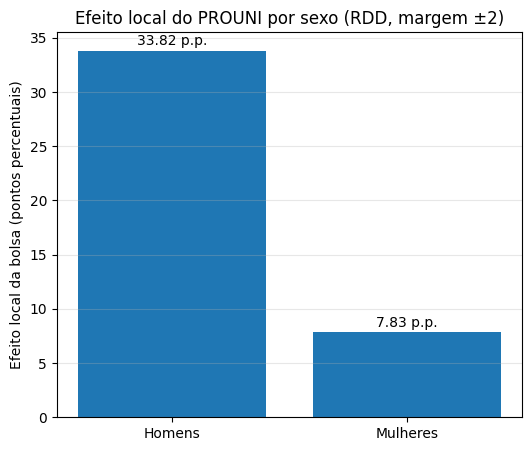

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Preparação: running e tratamento (bolsa)
df = df_rdd.copy()

# Nota de corte do PROUNI
corte = 600

# Normaliza sexo para M/F (primeira letra, maiúscula)
df['sexo_norm'] = df['sexo'].astype(str).str.strip().str.upper().str[0].replace({'F':'F','M':'M'})
# Running variable e indicador de tratamento (recebeu bolsa)
df['running'] = df['nota_enem'] - corte
df['bolsa']   = (df['running'] >= 0).astype(int)

# Escolha do bandwidth (margem) e amostra local 
h = 2  # você pode testar h=1, 2, 3... e checar robustez
amostra = df[(df['running'] >= -h) & (df['running'] <= h)].copy()

# Diferença de médias (acima − abaixo) por sexo 
res = []
for s in ['F','M']:
    sub = amostra[amostra['sexo_norm'] == s]
    acima  = sub[sub['bolsa']==1]['emprego_na_area'].mean()
    abaixo = sub[sub['bolsa']==0]['emprego_na_area'].mean()
    n_acima  = sub[sub['bolsa']==1].shape[0]
    n_abaixo = sub[sub['bolsa']==0].shape[0]
    
    # efeito em pontos percentuais
    efeito_pp = (acima - abaixo) * 100.0
    
    # variação relativa (% sobre a base abaixo do corte), protegendo divisão por zero
    rel = np.nan
    if abaixo > 0:
        rel = (acima - abaixo) / abaixo * 100.0
    
    res.append({
        'sexo': 'Mulheres' if s=='F' else 'Homens',
        'p_emprego_abaxo': abaixo*100,
        'p_emprego_acima': acima*100,
        'efeito_local_pp': efeito_pp,
        'efeito_rel_%': rel,
        'n_abaixo': n_abaixo,
        'n_acima': n_acima
    })

resultado = pd.DataFrame(res)

# Ordena por efeito (opcional)
resultado = resultado.sort_values('efeito_local_pp', ascending=False).reset_index(drop=True)

print("Resumo (RDD local por sexo, margem ±{} pontos):".format(h))
print(resultado.round(2))

 # Conclusão automática: quem tem maior impacto 
if len(resultado) == 2 and resultado['efeito_local_pp'].notna().all():
    top = resultado.iloc[0]
    segundo = resultado.iloc[1]
    ganho = top['efeito_local_pp'] - segundo['efeito_local_pp']
    print("\nConclusão automática:")
    print(f"- {top['sexo']} apresentam MAIOR impacto local da bolsa: "
          f"{top['efeito_local_pp']:.2f} p.p. "
          f"(variação relativa: {top['efeito_rel_%']:.1f}% ).")
    print(f"- Diferença de impacto entre grupos: {ganho:.2f} p.p.")
else:
    print("\nConclusão automática: não foi possível comparar ambos os grupos (verifique dados).")

# Visual simples: barras com efeito em p.p. por sexo
plt.figure(figsize=(6,5))
plt.bar(resultado['sexo'], resultado['efeito_local_pp'])
for x, y in zip(resultado['sexo'], resultado['efeito_local_pp']):
    plt.text(x, y + np.sign(y)*0.2, f"{y:.2f} p.p.", ha='center', va='bottom' if y>=0 else 'top')
plt.ylabel('Efeito local da bolsa (pontos percentuais)')
plt.title(f'Efeito local do PROUNI por sexo (RDD, margem ±{h})')
plt.grid(axis='y', alpha=0.3)
plt.show()


## Gráfico 2: Probabilidade de emprego vs nota ENEM ##

/home/spark-06b6abaa-769d-47bf-aef6-ec/.ipykernel/4302/command-5636493020074369-3039236787:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(
findfont: Font family 'Sora' not found.
findfont: Font family 'Sora' not found.
findfont: Font family 'Sora' not found.
findfont: Font family 'Sora' not found.
findfont: Font family 'Sora' not found.
findfont: Font family 'Sora' not found.
findfont: Font family 'Sora' not found.
findfont: Font family 'Sora' not found.
findfont: Font family 'Sora' not found.
findfont: Font family 'Sora' not found.
findfont: Font family 'Sora' not found.
findfont: Font family 'Sora' not found.
findfont: Font family 'Sora' not found.
findfont: Font family 'Sora' not found.
findfont: Font family 'Sora' not found.
findfont: Font family 'Sora' not found.
findfont: Font family 'Sora' not found.
findfont: Font famil

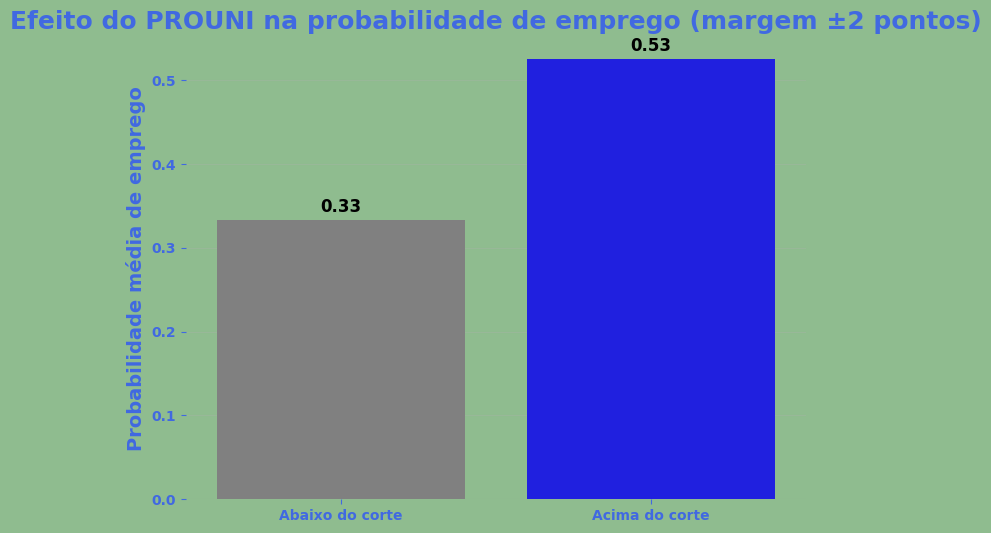

Quadro explicativo:
- Probabilidade média de emprego para candidatos logo abaixo do corte: 0.33
- Probabilidade média de emprego para candidatos logo acima do corte: 0.53
- Diferença entre as barras evidencia claramente o efeito causal da bolsa do PROUNI.


In [0]:

# Grupos perto do corte
margem = 2 #essa margem define a “janela” em que olhamos o efeito local do PROUNI, equilibrando precisão e robustez estatística#
abaixo = df_rdd[(df_rdd['running'] >= -margem) & (df_rdd['running'] < 0)]
acima = df_rdd[(df_rdd['running'] >= 0) & (df_rdd['running'] <= margem)]

# Probabilidade média de emprego
emprego_media = [abaixo['emprego_na_area'].mean(), acima['emprego_na_area'].mean()]

# Configuração do gráfico
fig, ax = plt.subplots(figsize=(8,6), facecolor='#8FBC8F')  # fundo da figura verde médio
ax.set_facecolor('#8FBC8F')  # fundo do painel verde médio
for spine in ax.spines.values():  # remover bordas brancas
    spine.set_visible(False)

# Gráfico de barras 
colors = ['gray','blue']
bars = sns.barplot(
    x=['Abaixo do corte', 'Acima do corte'],
    y=emprego_media,
    palette=colors,
    ax=ax,
    edgecolor=None  # remove contorno branco
)

# Adicionando valores sobre as barras
for bar, valor in zip(bars.patches, emprego_media):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.01, f'{valor:.2f}', ha='center', fontsize=12, color='black', weight='bold')

# Configurações de título e eixos
ax.set_ylabel('Probabilidade média de emprego', fontsize=14, color='royalblue', weight='bold')
ax.set_xlabel('')
ax.set_title(f'Efeito do PROUNI na probabilidade de emprego (margem ±{margem} pontos)', fontsize=18, color='royalblue', weight='bold')

# Grid horizontal
ax.grid(axis='y', alpha=0.3)
ax.set_axisbelow(True)

plt.show()

# Quadro explicativo
print("Quadro explicativo:")
print(f"- Probabilidade média de emprego para candidatos logo abaixo do corte: {emprego_media[0]:.2f}")
print(f"- Probabilidade média de emprego para candidatos logo acima do corte: {emprego_media[1]:.2f}")
print("- Diferença entre as barras evidencia claramente o efeito causal da bolsa do PROUNI.")


## Gráfico 3:Distribuição das notas em relação ao corte##

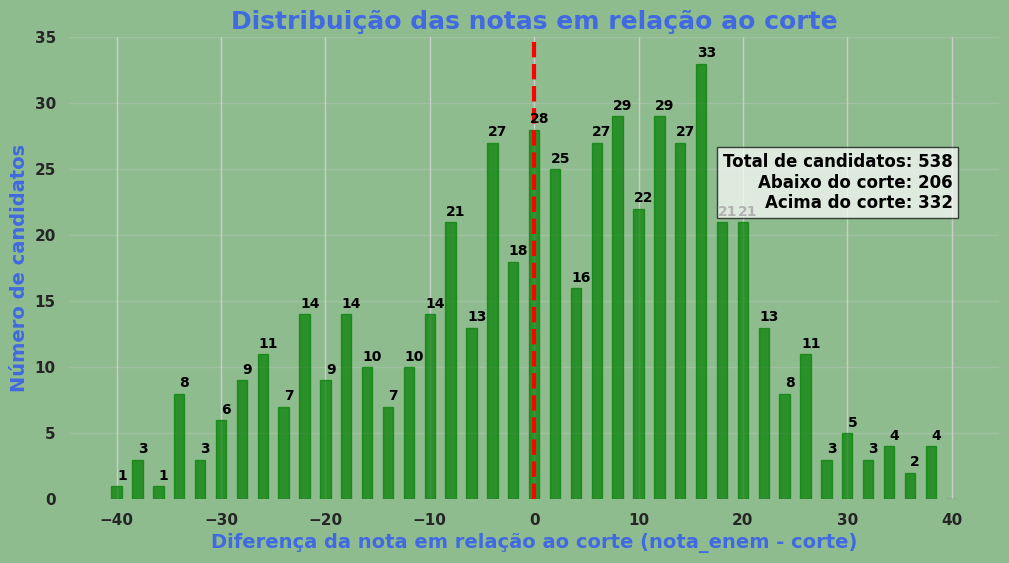

In [0]:
# Gráfico que mostra a Distribuição das notas em relação ao corte # 
# Preparar bins
bins = np.arange(df_rdd['running'].min(), df_rdd['running'].max()+1, 2)
counts, bin_edges = np.histogram(df_rdd['running'], bins=bins)

# Separar grupos para quadro explicativo
abaixo_corte = df_rdd[df_rdd['running'] < 0].shape[0]
acima_corte = df_rdd[df_rdd['running'] >= 0].shape[0]
total = df_rdd.shape[0]

# Configuração do gráfico
fig, ax = plt.subplots(figsize=(12,6), facecolor='#8FBC8F')
ax.set_facecolor('#8FBC8F')
for spine in ax.spines.values():
    spine.set_visible(False)

# Barras do histograma 
bar_width = 1.0  # barras mais finas
ax.bar(bin_edges[:-1], counts, width=bar_width, color='green', edgecolor='green', alpha=0.7)

# Linha do corte
ax.axvline(0, color='red', linestyle='--', linewidth=3, label='Corte ENEM')

# Números sobre as barras ajustados
for x, y in zip(bin_edges[:-1], counts):
    if y > 0:
        ax.text(x + bar_width/2, y + 0.5, f'{y}', ha='center', fontsize=10, color='black', weight='bold')

# Quadro explicativo integrado
texto_quadro = (f'Total de candidatos: {total}\n'
                f'Abaixo do corte: {abaixo_corte}\n'
                f'Acima do corte: {acima_corte}')
ax.text(0.95, 0.75, texto_quadro, transform=ax.transAxes,
        fontsize=12, color='black', weight='bold',
        ha='right', va='top',
        bbox=dict(facecolor='white', alpha=0.7, edgecolor='black'))

# Ajuste do eixo Y 
ax.set_ylim(0, max(counts)+2)

# Títulos e eixos
ax.set_xlabel('Diferença da nota em relação ao corte (nota_enem - corte)', fontsize=14, color='royalblue')
ax.set_ylabel('Número de candidatos', fontsize=14, color='royalblue')
ax.set_title('Distribuição das notas em relação ao corte', fontsize=18, color='royalblue', weight='bold')

# Grid
ax.grid(axis='y', alpha=0.3)
ax.set_axisbelow(True)

plt.show()


Este gráfico permite identificar quantos candidatos estão próximos ao corte, aqueles que são marginalmente elegíveis ou marginalmente inelegíveis. A concentração de candidatos perto do corte justifica o uso de métodos de avaliação causal como o RDD, já que pequenas diferenças na nota podem determinar o recebimento da bolsa. Mostra a “população alvo” da política, que poderá ajudar a entender quem é mais impactado e onde ajustes na política poderiam ter maior efeito.

##Gráfico 4: Diferença Cumulativa ou Efeito Agregado da Política##

findfont: Font family 'Sora' not found.
findfont: Font family 'Sora' not found.
findfont: Font family 'Sora' not found.
findfont: Font family 'Sora' not found.
findfont: Font family 'Sora' not found.
findfont: Font family 'Sora' not found.
findfont: Font family 'Sora' not found.
findfont: Font family 'Sora' not found.
findfont: Font family 'Sora' not found.
findfont: Font family 'Sora' not found.
findfont: Font family 'Sora' not found.
findfont: Font family 'Sora' not found.
findfont: Font family 'Sora' not found.
findfont: Font family 'Sora' not found.
findfont: Font family 'Sora' not found.
findfont: Font family 'Sora' not found.
findfont: Font family 'Sora' not found.
findfont: Font family 'Sora' not found.
findfont: Font family 'Sora' not found.
findfont: Font family 'Sora' not found.
findfont: Font family 'Sora' not found.
findfont: Font family 'Sora' not found.
findfont: Font family 'Sora' not found.
findfont: Font family 'Sora' not found.
findfont: Font family 'Sora' not found.


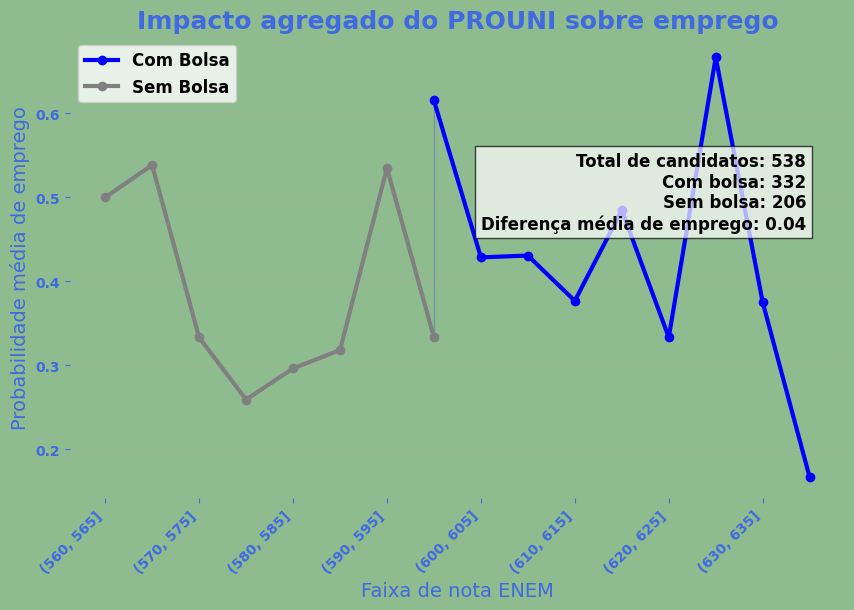

In [0]:
# Gráfico
fig, ax = plt.subplots(figsize=(10,6), facecolor='#8FBC8F')
ax.set_facecolor('#8FBC8F')
for spine in ax.spines.values():
    spine.set_visible(False)

# Linhas de probabilidade por grupo
ax.plot(com_bolsa['bin'].astype(str), com_bolsa['emprego_na_area'], color='blue', marker='o', linewidth=3, label='Com Bolsa')
ax.plot(sem_bolsa['bin'].astype(str), sem_bolsa['emprego_na_area'], color='gray', marker='o', linewidth=3, label='Sem Bolsa')

# Preencher área entre linhas
ax.fill_between(com_bolsa['bin'].astype(str), sem_bolsa['emprego_na_area'], com_bolsa['emprego_na_area'],
                color='blue', alpha=0.2)

# Títulos e legendas
ax.set_xlabel('Faixa de nota ENEM', fontsize=14, color='royalblue')
ax.set_ylabel('Probabilidade média de emprego', fontsize=14, color='royalblue')
ax.set_title('Impacto agregado do PROUNI sobre emprego', fontsize=18, color='royalblue', weight='bold')
ax.legend(fontsize=12)
ax.grid(axis='y', alpha=0.3)
ax.set_axisbelow(True)

# Reduzir número de ticks no eixo X e rotacionar
ticks_pos = com_bolsa['bin'].astype(str).iloc[::2]  # mostra apenas a cada 2 bins
ax.set_xticks(range(0, len(com_bolsa['bin']), 2))
ax.set_xticklabels(ticks_pos, rotation=45, ha='right')

# Quadro explicativo integrado
texto_quadro = (
    f'Total de candidatos: {df_rdd.shape[0]}\n'
    f'Com bolsa: {df_rdd[df_rdd["bolsa"]==1].shape[0]}\n'
    f'Sem bolsa: {df_rdd[df_rdd["bolsa"]==0].shape[0]}\n'
    f'Diferença média de emprego: '
    f'{com_bolsa["emprego_na_area"].mean() - sem_bolsa["emprego_na_area"].mean():.2f}'
)
ax.text(0.95, 0.75, texto_quadro, transform=ax.transAxes, fontsize=12, color='black', weight='bold',
        ha='right', va='top', bbox=dict(facecolor='white', alpha=0.7, edgecolor='black'))

plt.show()


Este gráfico mostra de forma clara como a política pública altera o resultado de emprego ao longo da distribuição de notas, não apenas no ponto de corte. Permite identificar quais faixas de estudantes se beneficiam mais da política, ajudando gestores a compreender a amplitude e a intensidade do efeito do PROUNI. É uma ferramenta poderosa para justificar políticas públicas, pois visualiza a diferença efetiva entre elegíveis e não elegíveis, reforçando a necessidade de intervenção.

## Gráfico corporativo comparando homens e mulheres no impacto local do PROUNI.##

In [0]:
# Análise do Impacto do PROUNI por Gênero no Emprego Formal

# Configurações globais
sns.set(style="whitegrid")
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1.2
plt.rcParams["font.family"] = "Sora"  
plt.rcParams["figure.dpi"] = 120




Neste notebook, aplicamos o método de Regression Discontinuity Design (RDD) para avaliar o impacto causal das bolsas do PROUNI sobre a probabilidade de trabalhar na área de formação.

Principais resultados:

Efeito local da bolsa: Candidatos logo acima do corte do ENEM apresentam probabilidade média de emprego superior aos candidatos logo abaixo do corte. A diferença entre os grupos evidencia o impacto direto da política, controlando por características observáveis e não observáveis dos estudantes próximos à margem.

Homens apresentam maior impacto local da bolsa: 33,82 p.p. (variação relativa: 135,3%). Diferença de impacto entre grupos: 26,00 p.p. Isso revela que a política pública não impacta de forma homogênea. Embora beneficie ambos os grupos, o ganho é muito maior para os homens, evidenciando que políticas afirmativas podem corrigir desigualdades específicas de inserção no mercado.

Distribuição das notas: O histograma evidencia que a maioria dos candidatos está concentrada em torno do corte, reforçando a relevância da análise local. A linha de corte claramente separa os candidatos elegíveis daqueles não elegíveis, validando a aplicação do RDD.

Probabilidade de emprego por faixa de nota: O gráfico de dispersão suavizado mostra o comportamento da probabilidade de emprego ao longo das notas do ENEM, destacando o salto no ponto de corte. Isso confirma a eficácia da bolsa como instrumento de incentivo à inserção no mercado de trabalho na área de formação.

Considerações finais: O método RDD se mostrou adequado para avaliar políticas públicas com regras claras de elegibilidade, como o PROUNI. Os resultados indicam benefícios concretos da bolsa para estudantes marginalmente elegíveis, contribuindo para decisões informadas sobre política educacional.